# Implementation for Question B

beta: 0.22628571428571428
gamma: 0.07142857142857142
R_eff=1 at t= 44 d


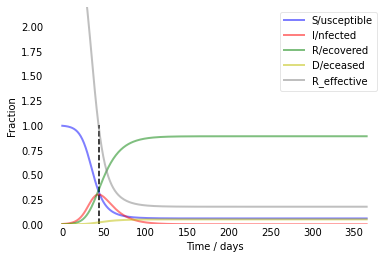

Fraction of deceased people: 0.049885447397252036


In [33]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# gamma is the average recovery rate such that 1/gamma is the average time it takes for an 
# individual to recover from the disease
# the official time to self-quarantine for COVID-19 is 14 days, so we will set gamme to 1/14

# The infectious power of the disease is between 2 and 5. It depends on countermeasures implemented. 
# i.e., R0 = 5 if nothing is done, and it can be as low as 2 if people are careful.

def get_beta_gamma(r_nought, recovery_time, mortality_rate):
    """Returns beta and gamma based
    on recovery time and infectious power R"""
    gamma = 1./recovery_time
    beta = r_nought*(gamma+mortality_rate)
    return beta,gamma

def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Initialize r_nought, the recovery time of the disease, mortality rate of the disease
r_nought = 3
recovery_time = 14
mu = 0.004

# Determine beta and gamma 
beta, gamma = get_beta_gamma(r_nought = r_nought, recovery_time = recovery_time, mortality_rate = mu)
print('beta:', beta)
print('gamma:', gamma)

# Population size
N = 1000

# Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
I0, R0 , D0 = 3, 0, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
S0 = N - I0 - R0 - D0 #normalization

# Initial conditions vector
y0 = S0, I0, R0, D0

# A grid of time points (in days)
t = np.linspace(0, 365, 365)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return vector

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if r_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
print('Fraction of deceased people:', D[-1]/N)

# Question b

In [34]:
def solve_question_b (r_nought, mortality_rate, plot = False):
    # Initialize r_nought, the recovery time of the disease, mortality rate of the disease
    r_nought = r_nought
    recovery_time = 14
    mu = mortality_rate

    # Determine beta and gamma 
    beta, gamma = get_beta_gamma(r_nought = r_nought, recovery_time = recovery_time, mortality_rate = mu)

    # Population size
    N = 1000

    # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
    I0, R0 , D0 = 3, 0, 0 #case zero

    # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0 #normalization

    # Initial conditions vector
    y0 = S0, I0, R0, D0

    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R, D = ret.T # return vector
    
    fraction_dead = D[-1]/N
    
    if plot == True:
        #find R_effective = 1 time
        t_1 = 0
        for time in range(0,len(S)):
            if r_nought*S[time]/N < 1: 
                t_1 = time
                break
        # print("R_eff=1 at t=", t_1, "d")

        # Plot the data on three separate curves for S(t), I(t) and R(t)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
        ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
        ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
        ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
        ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
        ax.set_xlabel('Time / days')
        ax.set_ylabel('Fraction')
        ax.set_ylim(0,2.2)
        ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        ax.set_title(rf"r_nought: {round(r_nought, 2)}, $\mu$: {mu}")
        plt.text(0.2, 0.4, f"D = t(365): {round(fraction_dead, 4)}")
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()
    
    return beta, gamma, fraction_dead

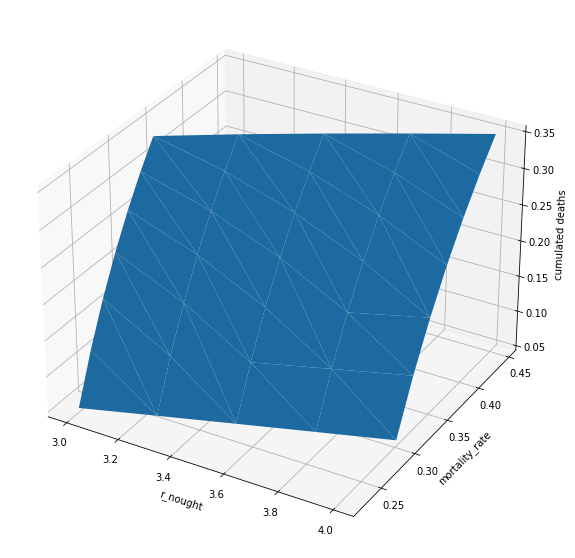

In [37]:
# range of r_nought:
r_nought = [*range(300, 401, 25)]
r_nought_list = []
for x in r_nought:
    r_nought_list.append(x/100)
    
# range of mortality rate:
mu = [*range(40, 401, 60)]
mu_list = []
for x in mu:
    mu_list.append(x/10000)

# Create initial, empty Dataframe
df_cum_deaths = pd.DataFrame(columns = ['r_nought', 
                                        'infection_rate', 
                                        'recovery_rate', 
                                        'mortality_rate', 
                                        'cum_deaths'])

for r_nought in r_nought_list:
    for mortality_rate in mu_list:
        beta, gamma, fraction_dead = solve_question_b(r_nought, mortality_rate, plot=False)
        
        # Store the basic reproduction number, the mortality rate and the cumulated number of deaths in a dictionary
        dict_ = {'r_nought': r_nought, 
                 'infection_rate': beta, 
                 'recovery_rate': gamma, 
                 'mortality_rate': mortality_rate, 
                 'cum_deaths': fraction_dead}
        
        # Append the data of dictionary to the dataframe
        df_cum_deaths=df_cum_deaths.append(dict_ , ignore_index=True)
        
# Plotting
X = list(df_cum_deaths.iloc[:, 0])
Y = list(df_cum_deaths.iloc[:, 1])
Z = list(df_cum_deaths.iloc[:, -1])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, linewidth=0.2, antialiased=True)
ax.set_xlabel('r_nought')
ax.set_ylabel('mortality_rate')
ax.set_zlabel('cumulated deaths')
plt.show()

# Experiments with subplotting

In [31]:
def solve_question_b (r_nought_list, mortality_rate_list, plot = False):
    
    # Create initial, empty Dataframe
    df_cum_deaths = pd.DataFrame(columns = ['r_nought', 
                                            'infection_rate', 
                                            'recovery_rate', 
                                            'mortality_rate', 
                                            'cum_deaths'])
    
    for r_nought in r_nought_list:
        for mortality_rate in mortality_rate_list:
            # Initialize r_nought, the recovery time of the disease, mortality rate of the disease
            r_nought = r_nought
            recovery_time = 14
            mu = mortality_rate

            # Determine beta and gamma 
            beta, gamma = get_beta_gamma(r_nought = r_nought, recovery_time = recovery_time, mortality_rate = mu)

            # Population size
            N = 1000

            # Initial conditions: 1 Infected, no Recovered individuals, no dead individuals
            I0, R0 , D0 = 3, 0, 0 #case zero

            # All others, S=N-I-R susceptible, initially S0=N-I0-R0-D0
            S0 = N - I0 - R0 - D0 #normalization

            # Initial conditions vector
            y0 = S0, I0, R0, D0

            # A grid of time points (in days)
            t = np.linspace(0, 365, 365)

            # Integrate the SIR equations over the time grid, t.
            ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
            S, I, R, D = ret.T # return vector
    
            fraction_dead = D[-1]/N
        
            # Store the basic reproduction number, the mortality rate and the cumulated number of deaths in a dictionary
            dict_ = {'r_nought': r_nought, 
                     'infection_rate': beta, 
                     'recovery_rate': gamma, 
                     'mortality_rate': mu, 
                     'cum_deaths': fraction_dead}
        
            # Append the data of dictionary to the dataframe
            df_cum_deaths=df_cum_deaths.append(dict_, ignore_index=True)
    

            #find R_effective = 1 time
            t_1 = 0
            for time in range(0,len(S)):
                if r_nought*S[time]/N < 1: 
                    t_1 = time
                    break

            # Plotting
            len_r_nought = len(r_nought_list)
            len_mu = len(mortality_rate_list)
            fig, ax = plt.subplots(len_r_nought, len_mu, figsize=(15,7))
            ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
            ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
            ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
            ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
            ax.plot(t, r_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
            ax.set_xlabel('Time / days')
            ax.set_ylabel('Fraction')
            ax.set_ylim(0,2.2)
            ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
            ax.yaxis.set_tick_params(length=0)
            ax.xaxis.set_tick_params(length=0)
            ax.grid(b=True, which='major', c='w', lw=2, ls='-')
            ax.set_title(rf"r_nought: {round(r_nought, 2)}, $\mu$: {mu}")
            plt.text(0.2, 0.4, f"D = t(365): {round(fraction_dead, 4)}")
            legend = ax.legend()
            legend.get_frame().set_alpha(0.5)
            for spine in ('top', 'right', 'bottom', 'left'):
                ax.spines[spine].set_visible(False)
            plt.show()
            # fig_all.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
            # for i in range(len_r_nought * len_mu):
                # plt.subplot(len_r_nought, len_mu, i+1)
                # fig_all.add_subplot(len_r_nought, len_mu,i+1), plt.xticks([]), plt.yticks([])
                # fig = plt.figure(facecolor='w')
                # fig, ax = fig.add_subplot(111, axisbelow=True)
         
    
    return df_cum_deaths